# Predicting H1N1 Vaccination Patterns Using Machine Learning

## 1. Introduction

The emergence of infectious diseases has been a significant public health concern worldwide. Vaccination plays a crucial role in controlling the spread of infectious diseases and mitigating their impact on society. 

One such outbreak, the H1N1 influenza pandemic of 2009, highlighted the importance of understanding vaccination behavior to improve immunization strategies.

In response to the 2009 H1N1 pandemic, governments and health organizations launched extensive vaccination campaigns to curb the spread of the virus. 

However, not all individuals chose to receive the vaccine, leading to variations in vaccine uptake across different demographics. 

Understanding the factors that influence vaccination behavior can help public health authorities design targeted campaigns, improve public trust in vaccines, and enhance overall vaccination rates in future pandemics.

This study aims to build a machine learning classification model to predict whether an individual received the H1N1 vaccine based on demographic, behavioral, and opinion-based survey data collected in the National 2009 H1N1 Flu Survey.
By leveraging data-driven insights, this research can provide valuable recommendations to policymakers and healthcare organizations on increasing vaccine uptake.

## 2. Business Understanding

The ability to predict vaccine uptake is essential for public health agencies, government bodies, and healthcare providers. These stakeholders rely on data-driven insights to optimize vaccination campaigns, improve outreach efforts, and allocate resources efficiently. Understanding the key factors that drive or hinder vaccination adoption enables targeted strategies that can increase immunization rates and reduce disease spread.

### Stakeholders

* Public Health Organizations (e.g., CDC, WHO): These organizations can use predictive models to identify high-risk populations and strategize vaccination drives.

* Government Agencies: Understanding vaccination behavior helps formulate better policies to improve vaccine access and reduce misinformation.

* Healthcare Providers & Hospitals: Identifying individuals who are less likely to get vaccinated allows healthcare facilities to engage in proactive education and intervention.

* Academic Researchers & Data Scientists: Insights derived from machine learning models can contribute to epidemiological research and improve future pandemic responses.

* Pharmaceutical Companies: Understanding public attitudes toward vaccines can help manufacturers improve vaccine outreach and distribution.

### Key Business Problem

Many individuals hesitate to receive vaccines due to concerns about effectiveness, potential side effects, lack of knowledge, or misinformation. To address these challenges, we seek to answer the following questions:

1. What patterns or trends were observed in the demographic and behavioral characteristics of individuals who received the H1N1 vaccine versus those who did not?(Exploratory Data Analysis)

2. Is there a significant difference in H1N1 vaccine uptake between individuals with different levels of education (e.g., no high school, high school graduate, college degree, etc.)?(Hypothesis testing)

3. Which machine learning models is best for predicting the likelihood of an individual receiving the H1N1 vaccine, incorporating demographic and behavioral data?(Modeling)

4. What were the most important features (demographic, behavioral, and attitudinal) for predicting H1N1 vaccine uptake using machine learning models? (Feature Importance)

By addressing these questions, this study provides actionable insights that stakeholders can use to enhance vaccination campaigns, improve public trust, and prepare for future pandemics.

## 3. Data Understanding

The dataset used in this study is sourced from the National 2009 H1N1 Flu Survey, conducted by the U.S. National Center for Health Statistics. It consists of responses from individuals across various demographic backgrounds and captures behavioral patterns, health conditions, and personal opinions regarding vaccination.

### Dataset Overview

The dataset contains:

* 36 feature columns representing different attributes of survey respondents.

* 1 target variable (h1n1_vaccine) indicating whether an individual received the H1N1 vaccine (binary: 0 = No, 1 = Yes).

* A mix of numerical, categorical, and binary variables related to demographics, health, and opinions on vaccines.

#### Feature Categories

The dataset includes a wide range of variables grouped into the following categories:

1. Demographic Information:

Age group, education level, race, gender, marital status, income level, and employment status.

2. Health-Related Information:

Presence of chronic medical conditions, healthcare worker status, household composition (number of adults and children).

3. Behavioral Factors:

Actions taken to prevent illness (e.g., avoiding large gatherings, wearing face masks, using hand sanitizers).

4. Opinion-Based Factors:

Perceptions of vaccine effectiveness, risk of contracting H1N1, and concerns about vaccine side effects.

5. External Influences:

Whether a doctor recommended the vaccine, whether the respondent has health insurance.


### Target Variable

* h1n1_vaccine (Binary: 1 = Vaccinated, 0 = Not Vaccinated)

* This serves as the dependent variable for the classification model.


### Data Distribution & Summary

Before proceeding with modeling, we will analyze the dataset to identify potential issues:

* Missing Data: Some features, such as employment industry and occupation, contain missing values and require imputation.

* Imbalanced Classes: The proportion of vaccinated vs. non-vaccinated individuals may be skewed, requiring balancing techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weighting.

* Feature Correlations: Understanding relationships between features helps in feature selection and engineering.

* Categorical Encoding Needs: Variables like education, marital status, and race require encoding for machine learning models.

By performing a thorough data exploration, we ensure that the dataset is well-prepared for training predictive models, maximizing the accuracy and reliability of vaccination uptake predictions.



# 4. Data Preparation 

 1. Data Cleaning

    Missing Values: The research addressed missing values in both features and labels.
    Features like h1n1_concern, h1n1_knowledge, or opinion_h1n1_vacc_effective were imputed with the mode (most common value) to ensure no data was lost.

    For binary columns like behavioral_antiviral_meds, chronic_med_condition, and others, missing values were treated as 0 (No) because they likely indicate non-participation in those behaviors or conditions.

    Inconsistent Categories: The research also ensured that categorical features (like age_group, education, race, income_poverty) had consistent values by checking for spelling errors or varied formats, such as "Below Poverty" vs. "< $25,000". This helped avoid errors during analysis.

2. Feature Engineering

    Interaction Features: The research combined age_group and education to create a new feature that captured how vaccination decisions might vary based on both factors. 
    
    Similarly, health_insurance and chronic_med_condition were combined to understand the influence of healthcare access on vaccination behavior.

    Health Behavior Index: The various behavioral_* features were combined into a health-conscious behavior index. This index was created by summing or averaging features like behavioral_wash_hands, behavioral_face_mask, and behavioral_avoidance to reflect overall health behavior.

3. Categorical Encoding

    One-Hot Encoding: The research used one-hot encoding for categorical variables like age_group, education, race, and marital_status, as these were non-ordinal.

    For example, education was encoded into multiple binary columns like "High School", "Bachelor's", "Master's", etc.
   
    Label Encoding: For ordinal variables like opinion_h1n1_vacc_effective, where higher values indicated stronger beliefs in the vaccine’s effectiveness, label encoding was applied to convert them into numerical values.

4. Feature Scaling

    Scaling Numeric Features: The research scaled numeric features like household_adults, household_children, and income_poverty using standard scaling (mean = 0, variance = 1), as these features were used in distance-based models like logistic regression.

    Log Transformation: If features like income_poverty had a skewed distribution, the research applied a logarithmic transformation to make the data more normally distributed and reduce bias in the models.

5. Handling Class Imbalance

    Target Distribution: Since the research involved predicting vaccination behaviors, it identified a class imbalance (e.g., fewer vaccinated people than unvaccinated). 

    To address this:
    Resampling was used to oversample the minority class using SMOTE (Synthetic Minority Over-sampling Technique), ensuring better model performance.

    For models like logistic regression, class weights were adjusted to account for this imbalance.
6. Data Splitting

    Train-Test Split: The research divided the data into training and testing sets using an 80/20 split, ensuring that both H1N1 and seasonal flu vaccine labels were represented in both sets.

    Cross-Validation: 5-fold cross-validation was implemented to ensure the model’s performance was consistent and generalizable, avoiding overfitting to a specific training set.

In [216]:
# importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


We first merge Training data with training labels since they have a commom column. However, for test data, respondent_id do not match with the rest of the datasets implying that the data will be cleaned separately

In [217]:
#load datasets
features = pd.read_csv("D:/Phase 3 final project/training_set_features.csv")

features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [218]:
labels = pd.read_csv("D:/Phase 3 final project/training_set_labels.csv")
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [219]:
#merging the datasets on the 'respondent_id' column
merged_data = pd.merge(labels, features, on='respondent_id', how='inner')
merged_data.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [220]:
merged_data.duplicated().sum()

np.int64(0)

In [221]:
merged_data.shape

(26707, 38)

In [222]:
# List of columns to keep for predicting h1n1_vaccine
#these are columns that have a direct effect on h1n1_vaccine
columns_to_keep = [
    'h1n1_vaccine', 'h1n1_concern', 'h1n1_knowledge',
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months',
    'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty',
    'marital_status', 'employment_status', 'hhs_geo_region', 
    'household_adults', 'household_children'
]

# Filter the dataset to keep only the necessary columns
merged_data_h1n1 = merged_data[columns_to_keep]

# Display the first few rows of the cleaned dataset
vaccine_counts = merged_data_h1n1["h1n1_vaccine"].value_counts()
vaccine_counts


h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

In [223]:
#checking dataset information
merged_data_h1n1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [224]:
merged_data_h1n1["hhs_geo_region"].unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [225]:
#checking unique values
for column in merged_data_h1n1:
    unique_values = merged_data_h1n1[column].unique()
    print(f"{column}: {unique_values} ", '\n')

h1n1_vaccine: [0 1]  

h1n1_concern: [ 1.  3.  2.  0. nan]  

h1n1_knowledge: [ 0.  2.  1. nan]  

behavioral_antiviral_meds: [ 0.  1. nan]  

behavioral_avoidance: [ 0.  1. nan]  

behavioral_face_mask: [ 0.  1. nan]  

behavioral_wash_hands: [ 0.  1. nan]  

behavioral_large_gatherings: [ 0.  1. nan]  

behavioral_outside_home: [ 1.  0. nan]  

behavioral_touch_face: [ 1.  0. nan]  

doctor_recc_h1n1: [ 0. nan  1.]  

chronic_med_condition: [ 0.  1. nan]  

child_under_6_months: [ 0.  1. nan]  

health_worker: [ 0.  1. nan]  

health_insurance: [ 1. nan  0.]  

opinion_h1n1_vacc_effective: [ 3.  5.  4.  2.  1. nan]  

opinion_h1n1_risk: [ 1.  4.  3.  2.  5. nan]  

opinion_h1n1_sick_from_vacc: [ 2.  4.  1.  5.  3. nan]  

age_group: ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']  

education: ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]  

race: ['White' 'Black' 'Other or Multiple' 'Hispanic']  

sex: ['Female' 'Male']  

income_pove

In [226]:
merged_data_h1n1.isna().sum()

h1n1_vaccine                       0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
employment_status               1463
hhs_geo_region                     0
household_adults                 249
h

## Data Cleaning

### Data cleaning/Data cleansing/Data Wrangling will cover the following
1. Checking the columns and changing mispelled to correct names
2. checking missing values
3. checking for duplicates
4. checking for outliers

In [227]:
#Checking the columns and changing mispelled to correct names
merged_data_h1n1.columns

Index(['h1n1_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'employment_status',
       'hhs_geo_region', 'household_adults', 'household_children'],
      dtype='object')

#### There are no misspelled names, no white spaces and the names are uniforms

In [228]:
#checking missing values and dealing with them
merged_data_h1n1.isna().sum()

h1n1_vaccine                       0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
employment_status               1463
hhs_geo_region                     0
household_adults                 249
h

In [229]:
merged_data_h1n1["health_insurance"].unique()

array([ 1., nan,  0.])

In [230]:
del merged_data_h1n1["health_insurance"]

In [231]:
merged_data_h1n1["income_poverty"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [232]:
merged_data_h1n1.isna().sum()

h1n1_vaccine                      0
h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
employment_status              1463
hhs_geo_region                    0
household_adults                249
household_children              249
dtype: int64

In [233]:
#using Object-Oriented programing to handle the rest of the missing data

In [234]:
# List of columns to impute with the mode
columns_to_impute_mode = [
    "h1n1_knowledge",
    "behavioral_touch_face",
    "behavioral_avoidance",
    "household_children",
    "household_adults",
    "opinion_h1n1_risk",
    "opinion_h1n1_vacc_effective",
    "opinion_h1n1_sick_from_vacc",
    "health_worker",
    "child_under_6_months",
    "chronic_med_condition",
    "education",
    "marital_status",
    "employment_status",
    "chronic_med_condition",
    "income_poverty",
    "doctor_recc_h1n1"
    
]

# List of columns to drop rows with missing values
columns_to_drop_missing = [
    "behavioral_face_mask",
    "behavioral_wash_hands",
    "behavioral_antiviral_meds",
    "behavioral_outside_home",
    "behavioral_large_gatherings",
    "h1n1_concern"
]

# Class definition for MissingDataHandler
class MissingDataHandler:
    def __init__(self, dataframe):
        self.dataframe = dataframe.copy()  # Ensure we are working with a copy of the dataframe
    
    def impute_mode(self, column):
        """
        Impute missing values in a given column with the mode (most frequent value)
        """
        mode_value = self.dataframe[column].mode()[0]
        # Using .loc to avoid SettingWithCopyWarning
        self.dataframe.loc[:, column] = self.dataframe[column].fillna(mode_value)
        print(f"Missing values in {column} have been imputed with the mode: {mode_value}")
    
    def drop_rows_with_missing(self, column):
        """
        Drop rows with missing values in a given column
        """
        self.dataframe = self.dataframe.loc[self.dataframe[column].notna()]  # Filter rows where column is not missing
        print(f"Dropped rows due to missing values in {column}")
    
    def show_missing_summary(self):
        """
        Show the percentage of missing values in each column
        """
        missing_data = self.dataframe.isnull().sum() / len(self.dataframe) * 100
        print("Missing Data Summary:")
        print(missing_data)

# Initialize the MissingDataHandler with the merged_data_h1n1 dataframe
data_handler = MissingDataHandler(merged_data_h1n1)

# Apply imputation using the mode for specified columns
for column in columns_to_impute_mode:
    data_handler.impute_mode(column)

# Drop rows with missing values for the specified columns
for column in columns_to_drop_missing:
    data_handler.drop_rows_with_missing(column)

# Show the updated missing data summary after imputation and dropping rows
data_handler.show_missing_summary()


Missing values in h1n1_knowledge have been imputed with the mode: 1.0
Missing values in behavioral_touch_face have been imputed with the mode: 1.0
Missing values in behavioral_avoidance have been imputed with the mode: 1.0
Missing values in household_children have been imputed with the mode: 0.0
Missing values in household_adults have been imputed with the mode: 1.0
Missing values in opinion_h1n1_risk have been imputed with the mode: 2.0
Missing values in opinion_h1n1_vacc_effective have been imputed with the mode: 4.0
Missing values in opinion_h1n1_sick_from_vacc have been imputed with the mode: 2.0
Missing values in health_worker have been imputed with the mode: 0.0
Missing values in child_under_6_months have been imputed with the mode: 0.0
Missing values in chronic_med_condition have been imputed with the mode: 0.0
Missing values in education have been imputed with the mode: College Graduate
Missing values in marital_status have been imputed with the mode: Married
Missing values in 

In [235]:
clean_data_H1N1 = data_handler.dataframe
clean_data_H1N1.isna().sum()

h1n1_vaccine                   0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
employment_status              0
hhs_geo_region                 0
household_adults               0
household_children             0
dtype: int64

In [236]:
del clean_data_H1N1["hhs_geo_region"]

In [237]:
clean_data_H1N1.shape

(26356, 26)

In [238]:
#checking unique values
for column in clean_data_H1N1:
    unique_values = clean_data_H1N1[column].unique()
    print(f"{column}: {unique_values} ", '\n')

h1n1_vaccine: [0 1]  

h1n1_concern: [1. 3. 2. 0.]  

h1n1_knowledge: [0. 2. 1.]  

behavioral_antiviral_meds: [0. 1.]  

behavioral_avoidance: [0. 1.]  

behavioral_face_mask: [0. 1.]  

behavioral_wash_hands: [0. 1.]  

behavioral_large_gatherings: [0. 1.]  

behavioral_outside_home: [1. 0.]  

behavioral_touch_face: [1. 0.]  

doctor_recc_h1n1: [0. 1.]  

chronic_med_condition: [0. 1.]  

child_under_6_months: [0. 1.]  

health_worker: [0. 1.]  

opinion_h1n1_vacc_effective: [3. 5. 4. 2. 1.]  

opinion_h1n1_risk: [1. 4. 3. 2. 5.]  

opinion_h1n1_sick_from_vacc: [2. 4. 1. 5. 3.]  

age_group: ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']  

education: ['< 12 Years' '12 Years' 'College Graduate' 'Some College']  

race: ['White' 'Black' 'Other or Multiple' 'Hispanic']  

sex: ['Female' 'Male']  

income_poverty: ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']  

marital_status: ['Not Married' 'Married']  

employment_status: ['Not in Labor Fo

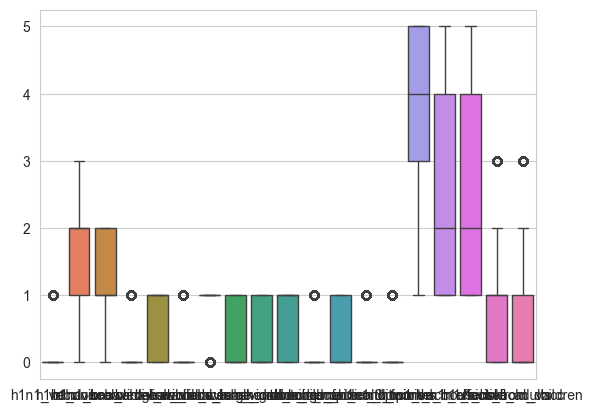

In [239]:
#checking outliers
sns.boxplot(clean_data_H1N1);

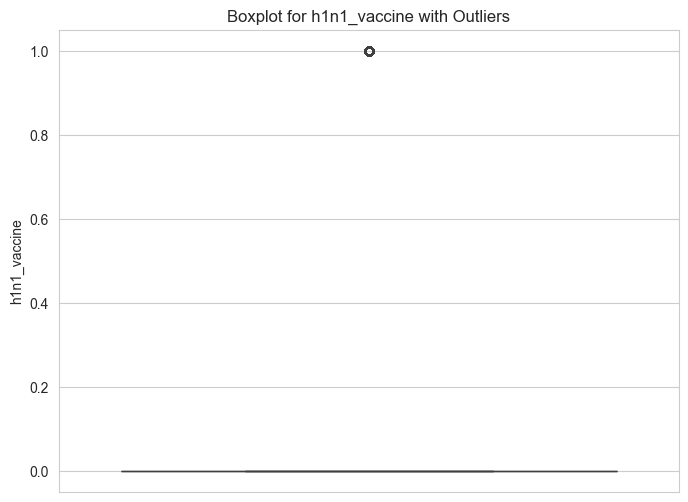

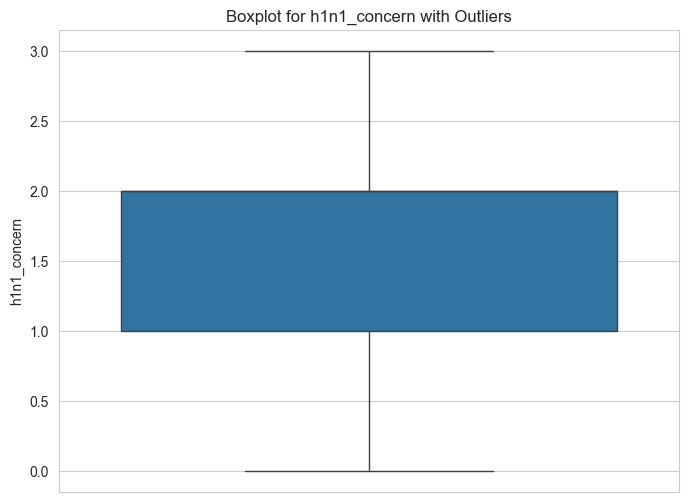

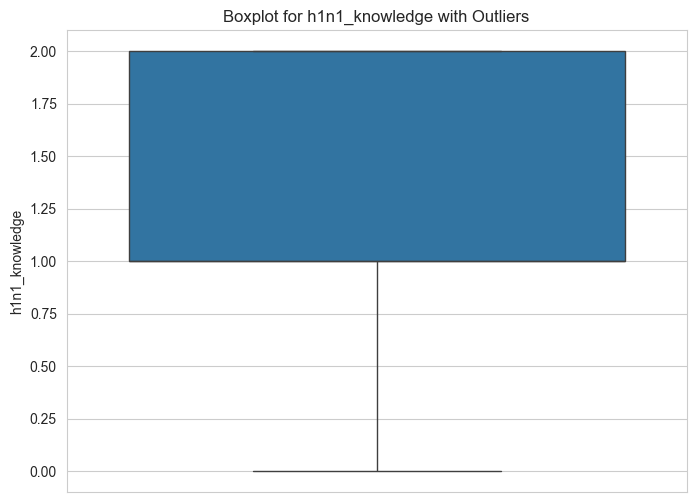

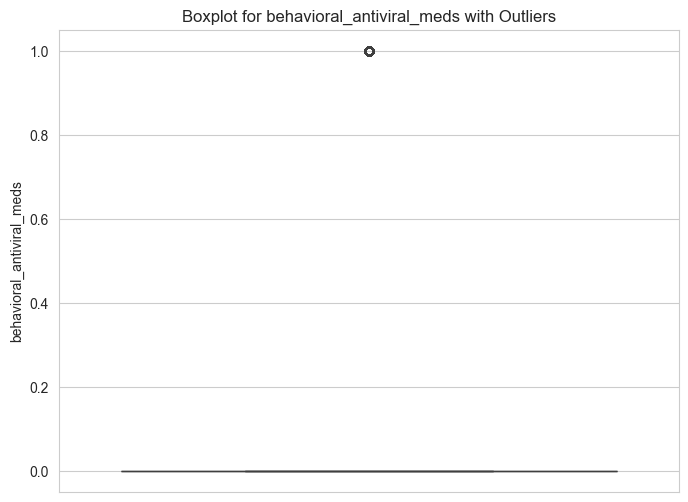

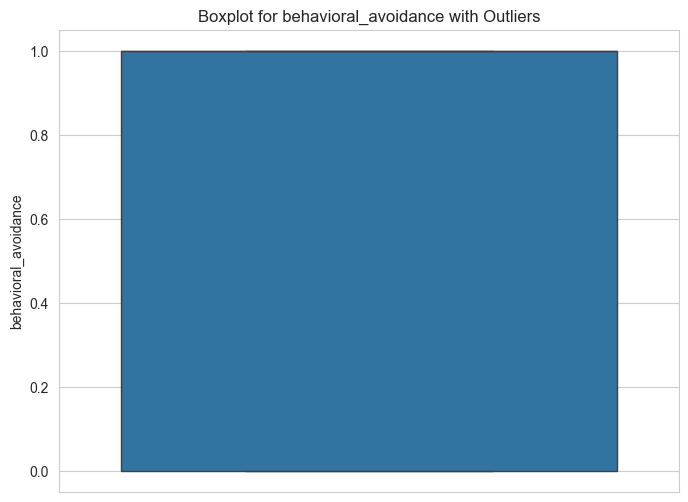

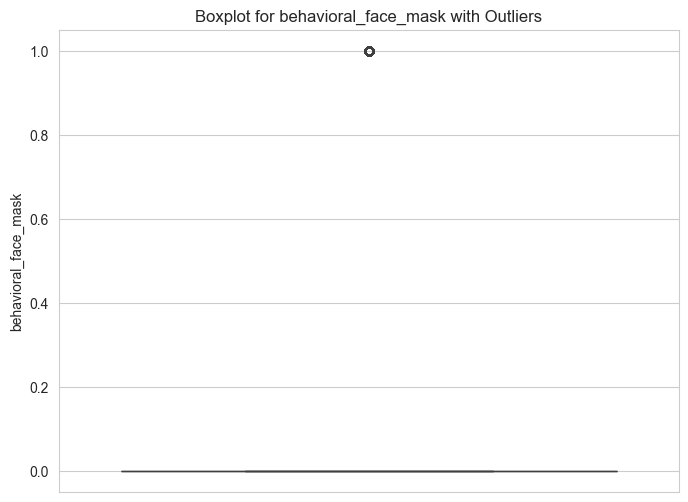

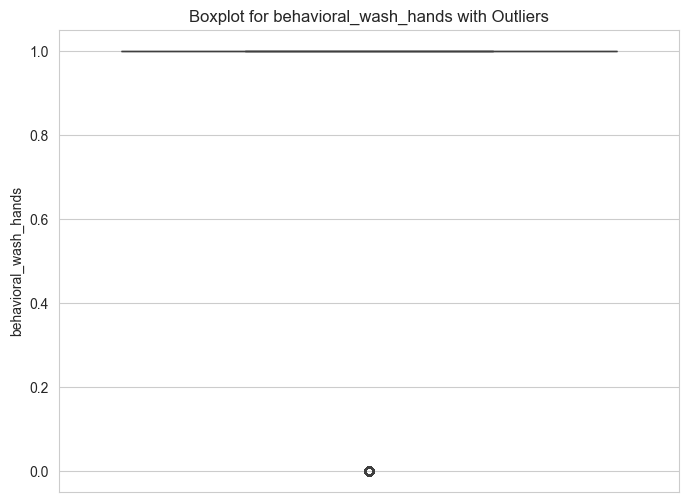

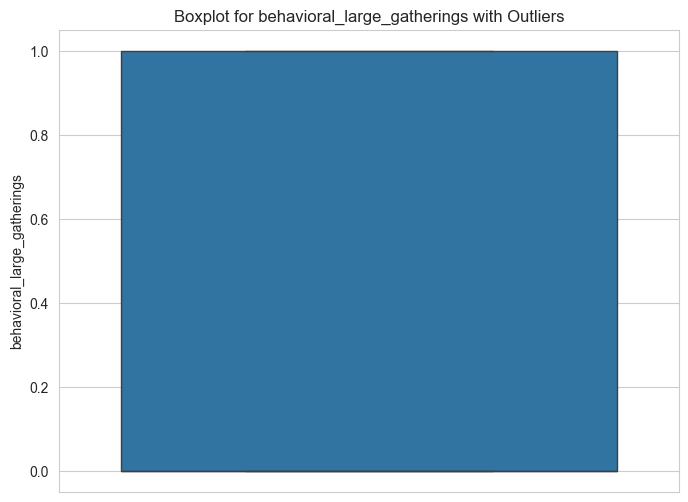

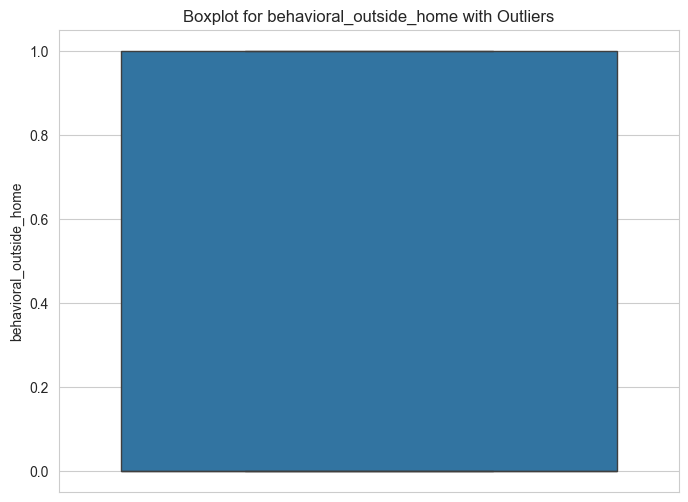

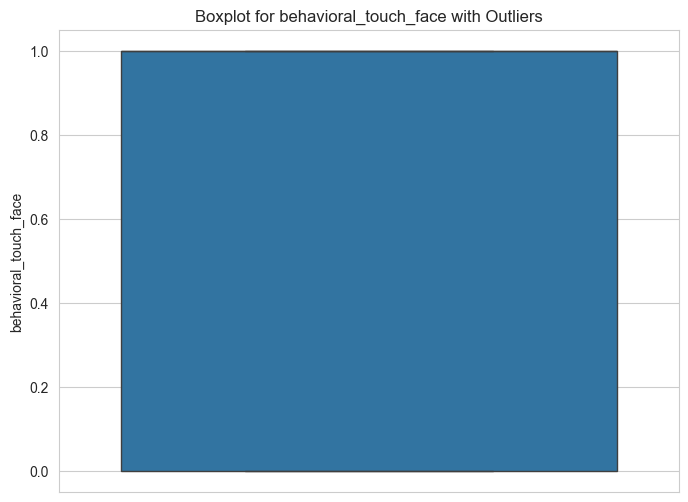

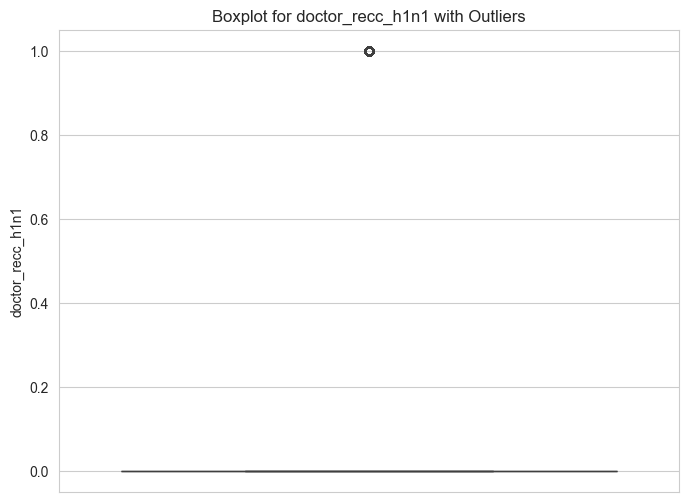

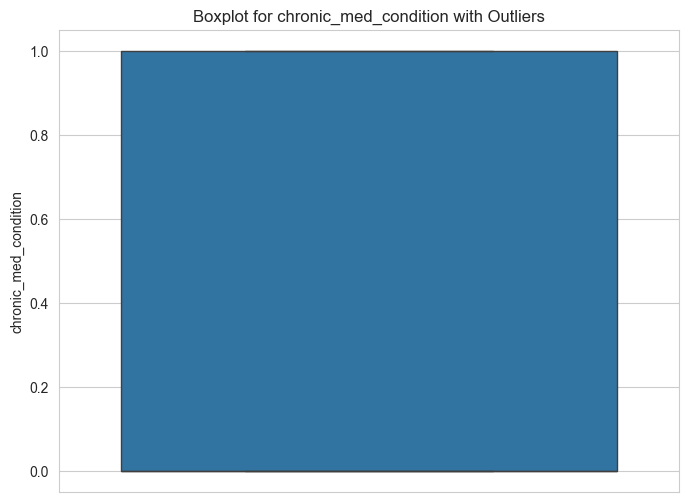

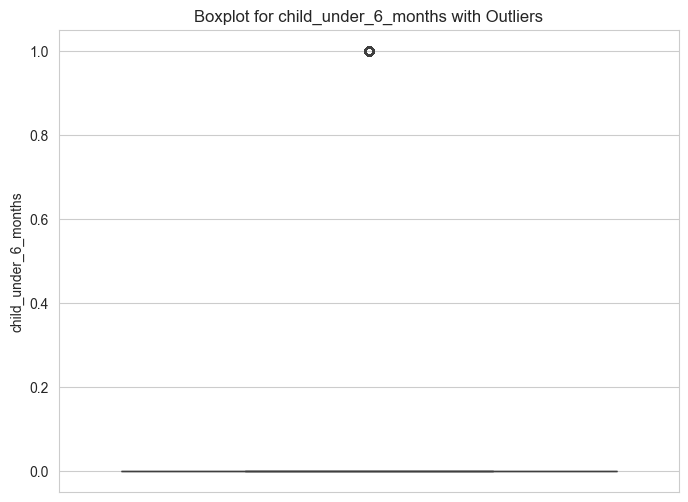

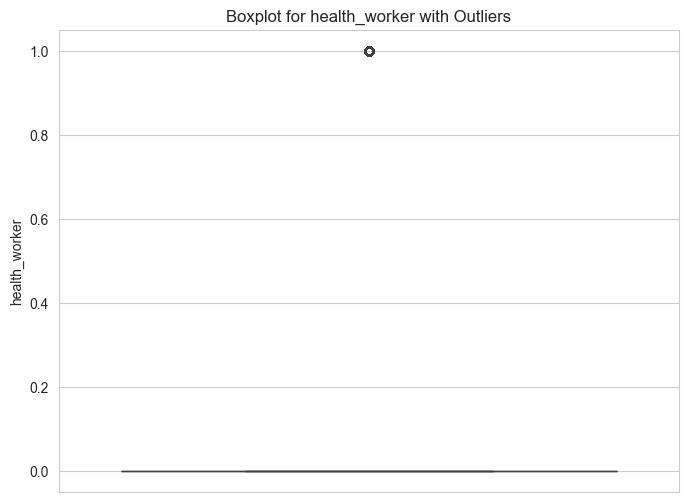

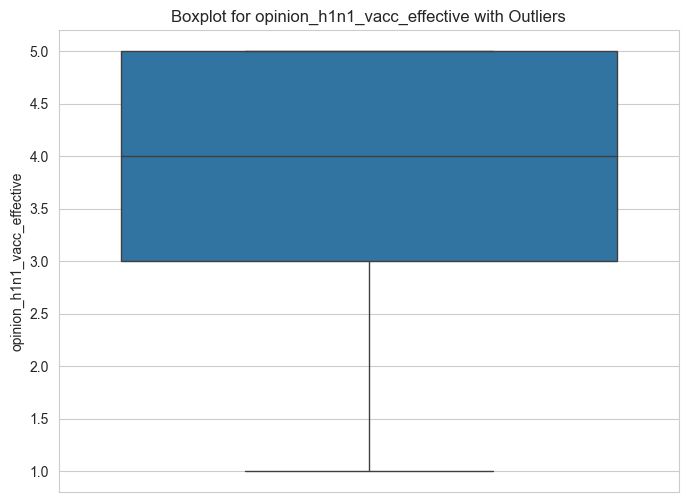

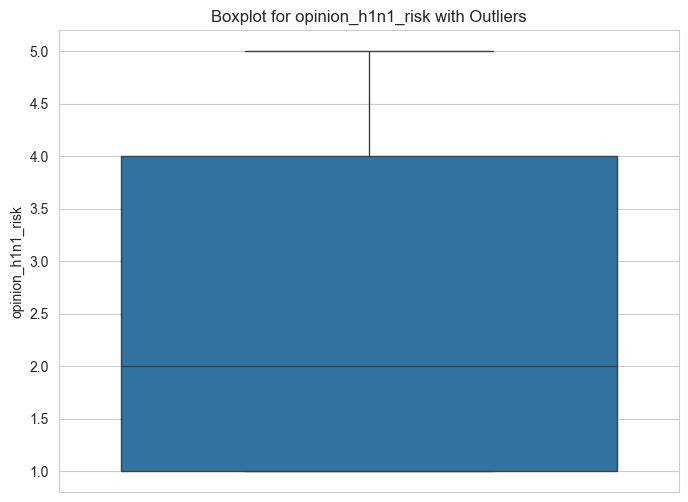

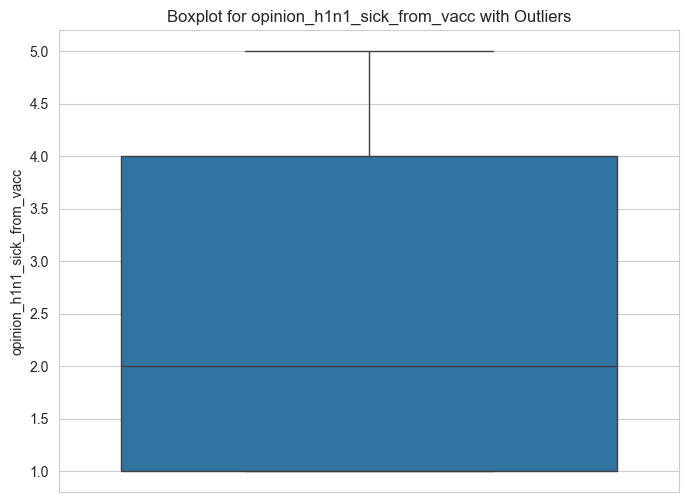

KeyError: 'hhs_geo_region'

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check for outliers
columns_to_check = [
    "h1n1_vaccine", "h1n1_concern", "h1n1_knowledge", "behavioral_antiviral_meds", 
    "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands", 
    "behavioral_large_gatherings", "behavioral_outside_home", "behavioral_touch_face", 
    "doctor_recc_h1n1", "chronic_med_condition", "child_under_6_months", "health_worker", 
    "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", 
    "age_group", "education", "race", "sex", "income_poverty", "marital_status", 
    "employment_status", "hhs_geo_region", "household_adults", "household_children"
]

# Loop over each column, checking for outliers in numeric columns only
for column in columns_to_check:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(clean_data_H1N1[column]): #check outliers only on numeric datatypes
        # Calculate the IQR (Interquartile Range)
        Q1 = clean_data_H1N1[column].quantile(0.25)
        Q3 = clean_data_H1N1[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = (clean_data_H1N1[column] < lower_bound) | (clean_data_H1N1[column] > upper_bound) #pipe that combines both lower bound and upper bound
        
        # Print outliers summary
        outlier_count = outliers.sum()
        
        # Create a boxplot to visualize the outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=clean_data_H1N1[column])
        plt.title(f"Boxplot for {column} with Outliers")
        plt.show()


In [ ]:
clean_data_H1N1.to_csv("clean_data_H1N1.csv", index=False)

In [ ]:
clean_data_H1N1_df = pd.read_csv("clean_data_H1N1.csv")

# Exploratory Data Analysis

#### EDA will answer the question below

#####  What patterns or trends were observed in the demographic and behavioral characteristics of individuals who received the H1N1 vaccine versus those who did not?

This question focuses on Exploratory Data Analysis (EDA) to uncover underlying patterns in the dataset. 

By comparing demographic variables like age, gender, income, education, and race, as well as behavioral factors like mask-wearing, hand hygiene, and social distancing, we can identify differences between those who chose to receive the H1N1 vaccine and those who did not. 

Key trends could include:

•	Whether certain demographic groups (e.g., older individuals, individuals with higher education, or those with higher income) were more likely to receive the vaccine.

•	Whether individuals who engaged in specific behaviors, such as frequent handwashing or mask-wearing, were more inclined to get vaccinated.

•	How perceptions about the vaccine's effectiveness and the risk of infection influenced decisions to get vaccinated.

The goal of this question is to identify any significant patterns that could guide public health efforts, helping to target specific groups that may benefit from more focused vaccine promotion strategies.


### 1. Univariate Visualizations (Single Variable Analysis)

#### i) H1N1 Vaccine Uptake

In [ ]:
# Create a bar plot for H1N1 vaccine uptake
plt.figure(figsize=(8, 6))

# Create a countplot for vaccine uptake (vaccinated vs non-vaccinated)
sns.countplot(x="h1n1_vaccine", data=clean_data_H1N1_df)

# Add title and labels
plt.title("H1N1 Vaccine Uptake")
plt.xlabel("Vaccine Uptake (0 = Non-Vaccinated, 1 = Vaccinated)")
plt.ylabel("Count")

# Show the plot
plt.show()




Observations:

##### Vaccine Uptake Distribution:

* The plot clearly shows a significant imbalance in the number of individuals who received the H1N1 vaccine versus those who did not.

* The non-vaccinated group (represented by 0) has a much larger count compared to the vaccinated group (represented by 1).

* The non-vaccinated bar is significantly higher, suggesting that a large proportion of individuals in the dataset chose not to receive the vaccine.

* The vaccinated bar is notably smaller, indicating a much lower proportion of individuals received the vaccine.
Imbalance:

* This distribution suggests that the dataset is imbalanced, with non-vaccinated individuals making up a much larger portion of the data. 

* Such an imbalance could affect modeling and analysis, as the models may be biased towards predicting the majority class (non-vaccinated).

##### Implications:

* The low vaccine uptake in the dataset might reflect real-world trends, where vaccine hesitancy or logistical barriers prevent many from getting vaccinated.

* The disproportionate class distribution could be addressed during modeling by using techniques such as oversampling the minority class (vaccinated individuals) or applying class weights to ensure that the model is not biased toward predicting the majority class.

##### Conclusion:

* The low H1N1 vaccine uptake emphasizes the need for increased civic education to raise awareness about the importance of vaccines in preventing illness and protecting public health. 

* Public health campaigns should focus on addressing misconceptions and improving vaccine accessibility, particularly for vulnerable and hesitant populations.

### 2. Bivariate Visualizations (Comparing Two Variables)



####  i) histogram for age distribution for vaccinated vs non-vaccinated individuals

In [ ]:
clean_data_H1N1.columns

In [ ]:
plt.figure(figsize=(10, 6))
#plot for vaccinated
sns.histplot(data=clean_data_H1N1_df[clean_data_H1N1_df['h1n1_vaccine'] == 1], 
             x='age_group', kde=False, color='black', label='Vaccinated', bins=20)
# Plot for non-vaccinated individuals
sns.histplot(data=clean_data_H1N1_df[clean_data_H1N1_df['h1n1_vaccine'] == 0], 
             x='age_group', kde=False, color='red', label='Non-Vaccinated', bins=20)
plt.title('Age Distribution for Vaccinated vs Non-Vaccinated Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend();

The stacked bars in the histogram suggests that age is a key factor in vaccine uptake

##### Patterns in Vaccine Uptake: 

* It reveals that non-vaccinated individuals are more concentrated in younger age groups, while older age groups have a higher proportion of vaccinated individuals. This could indicate that age plays a crucial role in vaccine decision-making, with older individuals possibly perceiving a higher risk of H1N1 infection and thus opting for the vaccine.

##### Further Insights: 

* The significant presence of vaccinated individuals in the older age brackets may point to the importance of targeting younger age groups for future vaccination drives, as they show lower uptake. Behavioral campaigns might need to focus on addressing concerns or misconceptions about the vaccine in these groups to increase their participation.

### ii) Vaccine Effectiveness Opinion vs Vaccine Uptake

In [ ]:
plt.figure(figsize=(8, 6))

# Create a countplot for vaccine effectiveness opinions, split by vaccine uptake

sns.countplot(x="opinion_h1n1_vacc_effective", hue="h1n1_vaccine", data=clean_data_H1N1_df)

# Add title and labels
plt.title("Opinions on H1N1 Vaccine Effectiveness by Vaccine Uptake")
plt.xlabel("Opinion on Vaccine Effectiveness")
plt.ylabel("Count")
plt.legend(title="Vaccine Uptake", labels=["Non-Vaccinated", "Vaccinated"]);

Observations:

##### Opinion Distribution:

* The opinions on vaccine effectiveness are likely rated on a scale from 1 to 5 (possibly ranging from "Very ineffective" to "Very effective").

* The largest count of responses is clustered around opinion rating 4 (likely indicating that the majority of individuals felt the vaccine was somewhat effective).

* Smaller proportions are seen for opinions rated 1, 2, and 3, which might represent more negative opinions about vaccine effectiveness (e.g., "Ineffective" to "Somewhat ineffective").

* Opinion 5 (possibly "Very effective") has a moderate representation, indicating that some people viewed the vaccine positively but less frequently than those who rated it as 4.


##### Vaccinated vs Non-Vaccinated:

Non-Vaccinated Individuals (Blue): 

* There is a significant concentration of non-vaccinated individuals with a rating of 4 (indicating that these individuals generally found the vaccine somewhat effective) but did not ultimately get vaccinated. The rating of 4 dominates this group.

Vaccinated Individuals (Orange): 

* The vaccinated group has a smaller, more spread-out distribution. The rating of 4 is still common among vaccinated individuals, but ratings of 5 (possibly "very effective") also appear more frequently than in the non-vaccinated group. This suggests that individuals who were more confident in the vaccine's effectiveness were more likely to get vaccinated.

##### Imbalance in Opinions:

* The non-vaccinated group is overwhelmingly concentrated around the "somewhat effective" category (rating 4), while the vaccinated group shows a more balanced distribution of ratings (with more people in the "very effective" category, i.e., rating 5).

##### Conclusion:

* There seems to be a perception gap between the vaccinated and non-vaccinated groups. While both groups have a significant portion of individuals believing that the vaccine was somewhat effective (rating 4), the vaccinated group has a higher proportion of individuals who believe the vaccine was "very effective" (rating 5).

* This could suggest that individuals who believe more strongly in the effectiveness of the vaccine are more likely to take it, while those with a more neutral or skeptical view (but still perceiving some effectiveness) may be less inclined to get vaccinated.

##### Potential Implications:

* Public health campaigns could focus on addressing the concerns and doubts among non-vaccinated individuals, particularly those who see the vaccine as somewhat effective but still hesitate to get vaccinated.

* Trust and perception of vaccine effectiveness play a significant role in vaccine uptake, which might be an area to focus on for improving vaccination rates.

#### iii) Correlation Heatmap

In [ ]:
# numerical columns 
numerical_data = clean_data_H1N1_df.select_dtypes(include=['float64', 'int64'])

# correlation matrix for numerical columns
corr_matrix = numerical_data.corr()

# matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title and show the plot
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### 1. Moderate Correlations:

Behavioral Factors:

* Behavioral Variables Correlations: Several behavioral variables show moderate correlations with each other, such as:
Mask-wearing, Hand washing, and Avoiding large gatherings have a strong positive correlation with each other (e.g., behavioral_face_mask with behavioral_wash_hands at 0.34). This suggests that individuals who engage in one form of preventive behavior are likely to engage in others as well.

* Social distancing behaviors (behavioral_large_gatherings and behavioral_outside_home) also show moderate correlations, suggesting that individuals who avoid large gatherings may also reduce contact outside their homes.

Vaccine Recommendations:

* Doctor's recommendation for the H1N1 vaccine (doctor_recc_h1n1) has a moderate positive correlation with H1N1 vaccine uptake (h1n1_vaccine with 0.39). 

* This indicates that individuals who received a recommendation from their doctor were more likely to get vaccinated.

Health-Related Factors:

* Chronic medical conditions (chronic_med_condition) show weak correlations with most of the behavioral and vaccine-related features but has some connection to H1N1 vaccine effectiveness opinions (opinion_h1n1_vacc_effective with 0.14), suggesting that individuals with chronic conditions may hold specific views on vaccine effectiveness.

##### 2. Weak or No Correlations:

* Household Size Variables (household_adults and household_children) show very weak or no significant correlations with vaccine-related factors. 

* This implies that the number of people in a household doesn't strongly affect whether an individual receives the vaccine or holds a specific opinion about it.

* The correlation between H1N1 vaccine effectiveness opinion and opinion on H1N1 risk is moderate (0.25), but it is not very strong. 

* This could suggest that individuals' perceived effectiveness of the vaccine does not always align with their perception of the risk of H1N1.

##### 3. Vaccine Uptake and Behavioral Factors:

* H1N1 vaccine uptake is negatively correlated with some behavioral factors, such as behavioral_avoidance (correlation of -0.05) and behavioral_face_mask (correlation of -0.07), suggesting that individuals who take actions to avoid illness may have lower vaccine uptake, though the relationship is weak.

##### 4. Key Takeaways:

* Public health implication: It would be beneficial to target people who engage in specific health behaviors (like mask-wearing, hand washing, and avoiding gatherings) for vaccination campaigns, as these individuals seem to be more concerned with preventing illness.

* Doctor Recommendations: Given the strong positive correlation between doctor recommendations and vaccine uptake, ensuring healthcare providers actively recommend the vaccine could improve vaccine uptake.

#### Conclusion:

* The heatmap reveals various relationships between behavioral factors, medical conditions, and vaccine uptake. There are strong correlations between preventive health behaviors and moderate correlations between vaccine uptake and doctor recommendations. 

* Addressing behaviors and perceptions surrounding vaccine effectiveness and integrating these findings into future health campaigns could help improve H1N1 vaccination rates.

### 3. Multivariate Visualizations (Multiple Variables at Once)

#### i) Facet plot of the H1N1 vaccine uptake based on gender and education level

In [ ]:


# Assuming 'clean_data_H1N1' is your DataFrame
# Use FacetGrid to create a grid of bar plots based on multiple categorical variables

g = sns.FacetGrid(clean_data_H1N1_df, col="education", row="sex", hue="h1n1_vaccine", height=4, aspect=1.5)

# Map countplot to the grid
g.map(sns.countplot, "h1n1_vaccine")

# Add titles and labels
g.set_axis_labels("H1N1 Vaccine Uptake", "Count")
g.set_titles(col_template="{col_name} Education", row_template="{row_name} Gender")

# Show plot
plt.show()


Observations:

#### Vaccine Uptake by Gender:

* The female gender (top row) shows higher vaccine uptake across all education levels compared to the male gender (bottom row).

* For both males and females, the non-vaccinated individuals (represented by the blue bars) far outweigh the vaccinated individuals (represented by the orange bars), suggesting a low overall uptake.

#### Vaccine Uptake by Education Level:

* Less than 12 Years Education: Both males and females in this group have very low vaccine uptake, with a significantly higher number of non-vaccinated individuals. However, the number of vaccinated individuals is very small.

* 12 Years Education: This group has a slightly higher vaccine uptake compared to the "less than 12 years" group, but the overall trend still shows that most individuals are non-vaccinated.

* Some College Education: For both genders, there’s an increase in the number of vaccinated individuals. However, the non-vaccinated individuals still dominate.

* College Graduate Education: There is a notable increase in vaccine uptake for both males and females with college graduate education, with more vaccinated individuals than in the other groups. Even so, non-vaccinated individuals are still more prevalent.

#### Key Insights:

* Higher education correlates with higher vaccine uptake: As education level increases, vaccine uptake also increases, particularly for individuals with a college graduate education.

* Gender differences: While vaccine uptake is higher among females across all education levels, the difference in vaccine uptake between genders appears to be minimal in each group. 

* The overall trend indicates that males and females both show relatively low vaccine uptake, with females slightly more likely to be vaccinated.

* Low overall uptake: Despite increasing vaccine uptake with higher education, the overall vaccine uptake remains low across all groups, with many individuals choosing not to get vaccinated.

### Conclusion:

* The plot reveals that education level plays a significant role in vaccine uptake, with individuals having a higher education more likely to receive the H1N1 vaccine. However, even among individuals with college graduate education, the overall uptake is still low. 

* This points to the need for more targeted public health campaigns addressing vaccine hesitancy, even among those with higher education, and highlighting the importance of vaccination for protecting both individual and public health. 

* Additionally, outreach efforts might be necessary to increase vaccine confidence among males and individuals with lower education levels.


# Hypothesis Testing

### Is there a significant difference in H1N1 vaccine uptake between individuals with different levels of education (e.g., no high school, high school graduate, college degree, etc.)?

##### H₀: There is no significant difference in the uptake of the H1N1 vaccine between individuals with different levels of education.


##### H₁: There is a significant difference in the uptake of the H1N1 vaccine between individuals with different levels of education.



1. Null Hypothesis (H₀):
The null hypothesis represents the idea that there is no significant difference in the H1N1 vaccine uptake between individuals with different levels of education. In other words, education level does not have a significant impact on whether a person gets vaccinated or not.

This assumes that education level (e.g., no high school, high school graduate, college degree, etc.) does not influence whether a person receives the vaccine.

2. Alternative Hypothesis (H₁):

The alternative hypothesis is the opposite of the null hypothesis and suggests that there is a significant difference in the uptake of the H1N1 vaccine between individuals with different levels of education.

Alternative Hypothesis (H₁): 

#### H₁: There is a significant difference in the uptake of the H1N1 vaccine between individuals with different levels of education.
This means that education level plays a role in whether individuals are likely to receive the vaccine or not.

3. Purpose of the Hypothesis Test:

The purpose of the hypothesis test is to evaluate the evidence from the sample data to determine whether we can reject the null hypothesis (H₀) in favor of the alternative hypothesis (H₁).

If we reject the null hypothesis (i.e., find a significant difference), it suggests that there is evidence that education level influences vaccine uptake.

If we fail to reject the null hypothesis (i.e., no significant difference), it suggests that there is no evidence to show that education level significantly affects vaccine uptake.

Statistical Test:

To test these hypotheses, a common approach is to use an ANOVA (Analysis of Variance) test, since I am comparing more than two groups (different levels of education). ANOVA helps determine if the mean vaccine uptake differs significantly across the different education levels.

In [ ]:
# Convert the 'education' column to categorical data 
education_categories = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
clean_data_H1N1_df['education'] = pd.Categorical(clean_data_H1N1_df['education'], categories=education_categories)

# Group the data by education level and get the uptake of H1N1 vaccine for each group
groups = [clean_data_H1N1_df[clean_data_H1N1_df['education'] == category]['h1n1_vaccine'] for category in education_categories]

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation of the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in H1N1 vaccine uptake between education levels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in H1N1 vaccine uptake between education levels.")

#### Detailed Analysis of the ANOVA Results:

##### F-statistic: 34.146

* The F-statistic is the ratio of the variance between the groups (education levels) to the variance within the groups (individual differences within each education level). A larger F-statistic indicates that the differences between the groups are larger relative to the variability within each group.

* In this case, the F-statistic of 34.146 is quite large. This suggests that the variance in H1N1 vaccine uptake between the different education levels is much larger than the variance within each education group. This indicates a significant difference in the vaccine uptake between the groups.

##### P-value: 5.12e-22

* The p-value represents the probability of obtaining the observed results (or more extreme results) under the assumption that the null hypothesis is true (i.e., there is no significant difference in vaccine uptake between education levels).

* A p-value of 5.12e-22 (which is extremely small) is much less than the typical significance level of 0.05. This very small p-value indicates that the likelihood of observing such a large difference in vaccine uptake across education levels due to random chance is virtually zero.

##### Conclusion: Reject the Null Hypothesis

* The null hypothesis (H₀) posits that there is no significant difference in H1N1 vaccine uptake between individuals with different education levels.

* The alternative hypothesis (H₁) suggests that there is a significant difference in vaccine uptake between individuals with different education levels.

* Since the p-value is extremely small (much less than 0.05), we reject the null hypothesis. This means that there is a statistically significant difference in the H1N1 vaccine uptake between the education levels.

##### What Does This Mean?

The rejection of the null hypothesis means that education level plays a significant role in determining whether individuals receive the H1N1 vaccine. Specifically:

* Individuals with higher education levels (e.g., college graduates) are more likely to get vaccinated compared to individuals with lower education levels (e.g., those with less than a high school education).

##### This could be due to various factors, including:

* Higher awareness and better access to information about the vaccine.

* Trust in medical advice and healthcare systems, which may be more prevalent among those with higher education.

* Greater access to healthcare and higher income levels associated with higher education, which might facilitate vaccine access.

#### Implications for Public Health Policy:

##### Targeted Interventions:

Given that education level significantly affects vaccine uptake, public health campaigns could benefit from being tailored to different education groups. For example:

* For individuals with lower education levels, more targeted educational campaigns might be needed to address concerns about the vaccine and raise awareness about its importance.

* Community outreach programs that address specific barriers (such as vaccine misinformation or logistical issues) in lower-education populations might help improve vaccine uptake.

##### Equity in Healthcare Access:

* The analysis highlights that health disparities may exist between different education groups. Those with lower education levels may face greater barriers in accessing vaccines or may have less trust in the vaccine’s efficacy.

* Public health policies could focus on reducing these disparities by ensuring that vaccination programs are equitable and accessible to everyone, regardless of their education level.

##### Focus on Education:

* The relationship between education and vaccine uptake reinforces the need for public health initiatives to not only provide access to vaccines but also engage in educational efforts that empower individuals with knowledge about the safety and importance of vaccines.

* This could include partnerships with schools, community centers, and local healthcare providers to distribute accurate vaccine information to different segments of the population.

#### Final Thought:

* The F-statistic and p-value demonstrate strong evidence that education level significantly affects H1N1 vaccine uptake. 

* The data supports the need for tailored interventions to increase vaccine uptake, especially among lower-education groups, and underscores the importance of addressing health disparities in future vaccination campaigns.

# Modeling 

The first question this part will answering is:

#### Which machine learning models is best for predicting the likelihood of an individual receiving the H1N1 vaccine?(Modeling)




### Preprocessing 

### label encoding vs onehotencoding

##### 1. LabelEncoder (Best for Ordinal Features)

* Ordinal features have a natural order, where the values have a meaningful ranking or progression. LabelEncoder can convert these ordinal categories into numerical values without introducing ambiguity.

Features likely suited for LabelEncoder:

* age_group: If the age groups have a natural order (e.g., "18-34 years", "35-44 years", etc.), then LabelEncoder would be appropriate for encoding the different age ranges as ordered values.

* education: If education levels are considered ordinal (e.g., "<12 years", "12 years", "Some College", "College Graduate"), LabelEncoder can be used because there is a natural progression in education levels.

* income_poverty: This could be ordinal (e.g., "Below Poverty", "Above Poverty"), as it may represent categorical status rather than an ordinal scale.

##### 2. OneHotEncoder (Best for Nominal Features)

Nominal features are categories with no inherent order. 

* For example, gender, race, and marital status do not have any meaningful ranking and should be encoded as separate binary variables (using OneHotEncoding).

Features likely suited for OneHotEncoder:

* race: Race is a nominal feature (e.g., "White", "Black", "Asian"), and there is no inherent order between these categories.

* sex: Sex is a nominal feature (e.g., "Male", "Female") with no meaningful order.

* marital_status: This is nominal (e.g., "Married", "Single", "Divorced"), as the categories do not have a natural ranking.

* employment_status: This is nominal (e.g., "Employed", "Unemployed", "Retired"), as there is no inherent order.

* hhs_geo_region: This is nominal (e.g., geographical region codes) and does not have a natural order.

In [ ]:
clean_data_H1N1_df.head()

In [ ]:
clean_data_H1N1_df["income_poverty"].unique()

In [ ]:

labels = LabelEncoder()
clean_data_H1N1_df["age_group"] =labels.fit_transform(clean_data_H1N1_df["age_group"])
clean_data_H1N1_df.head(20)

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of ordinal features for LabelEncoder
ordinal_columns = ['age_group', 'education', "income_poverty"]

# Apply LabelEncoder to each of the ordinal columns
for column in ordinal_columns:
    clean_data_H1N1_df[column] = label_encoder.fit_transform(clean_data_H1N1_df[column])

# Display the first 20 rows of the DataFrame to check
clean_data_H1N1_df

In [ ]:

# Initialize OneHotEncoder with 'drop' to avoid dummy variable trap
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# List of nominal features for OneHotEncoder
nominal_columns = ['marital_status', 'employment_status', "race", "sex"]

# Apply OneHotEncoder to each of the nominal columns and add the results to the DataFrame
for column in nominal_columns:
    # Fit and transform the data for the categorical feature
    encoded_data = onehot_encoder.fit_transform(clean_data_H1N1_df[[column]])
    
    # Convert the numpy array to a DataFrame with appropriate column names
    encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out([column]))
    
    # Drop original column and add encoded columns
    clean_data_H1N1_df = clean_data_H1N1_df.drop(columns=[column])  # Drop the original column
    clean_data_H1N1_df = pd.concat([clean_data_H1N1_df, encoded_df], axis=1)  # Add the encoded columns

# Display the first 20 rows of the updated DataFrame to verify
clean_data_H1N1_df.head(20)




In [ ]:
#Data splitting

x = clean_data_H1N1_df.drop("h1n1_vaccine",axis=1)
y = clean_data_H1N1_df["h1n1_vaccine"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
X_train

In [ ]:
#clean_data_H1N1["h1n1_vaccine"]

In [ ]:
# Check if there are any NaN values in the target column
#clean_data_H1N1['h1n1_vaccine'].isna().sum()


In [ ]:
clean_data_H1N1_df.isna().sum()

In [ ]:
# Replace NaN values in the target column with the mode (most frequent value)
#clean_data_H1N1['h1n1_vaccine'].fillna(clean_data_H1N1['h1n1_vaccine'].mode()[0], inplace=True)


In [ ]:
#standardizing
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
class_distribution = clean_data_H1N1_df['h1n1_vaccine'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Title for the pie chart
plt.title('Class Distribution of H1N1 Vaccine Uptake')

# Display the pie chart
plt.show()

Based on the above piechart, the Data is highly imbalanced. It is biased towards those who have not been vaccinated. SMOTE which generates synthetic data will be used to balance the data

In [ ]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=0)

# Apply SMOTE to the training set (this generates synthetic data)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sc, y_train)

pd.Series(y_train_resampled).value_counts()


### Performance metric

Performance will be evaluated according to the area under the receiver operating characteristic curve (ROC AUC) for each of the target variable. 

The mean of the two scores will be the overall score. A higher value indicates stronger performance.

ROC AUC

1. Definition:

ROC AUC (Receiver Operating Characteristic - Area Under the Curve) measures a classification model’s ability to distinguish between classes. It summarizes the trade-off between sensitivity (recall) and specificity.

2. Interpretation:

AUC = 1.0 → Perfect classifier
AUC > 0.8 → Good model
AUC = 0.5 → Random guessing
AUC < 0.5 → Worse than random

3. ROC Curve Components:

True Positive Rate (TPR) = Sensitivity = TP / (TP + FN)
False Positive Rate (FPR) = 1 - Specificity = FP / (FP + TN)

4. Usage:

Helps compare models
Works well with imbalanced datasets
AUC close to 1.0 means better discrimination



## 1) LogisticRegression

**Overview**
* Purpose: A statistical method used for binary classification (e.g., yes/no, 0/1), though it can be extended to multi-class problems.

* Core Idea: Predicts the probability that an instance belongs to a particular class using a logistic function (sigmoid), which maps linear combinations of features to values between 0 and 1.


* Transforms linear regression output 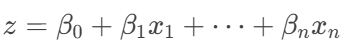 into a probability: 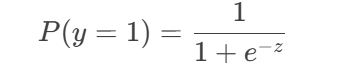

**Decision Boundary:**

A threshold (e.g., 0.5) converts probabilities to class labels. If P(y=1)≥0.5, predict class 1; else, predict class 0.

The boundary is linear in feature space.

**Odds and Log-Odds**

Odds: P(y=1)/(1−P(y=1)) = z

​This linear relationship is the basis of logistic regression.

**Cost Function: Log Loss**

Objective: Minimize the negative log-likelihood (cross-entropy loss)
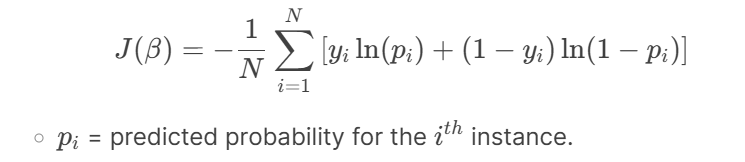

Properties: Convex but not closed-form; solved via gradient descent or Newton-Raphson.

**Coefficient Estimation**
Maximum Likelihood Estimation (MLE):

Finds coefficients 
* β that maximize the likelihood of observing the data.

* Iterative optimization (e.g., Iteratively Reweighted Least Squares).

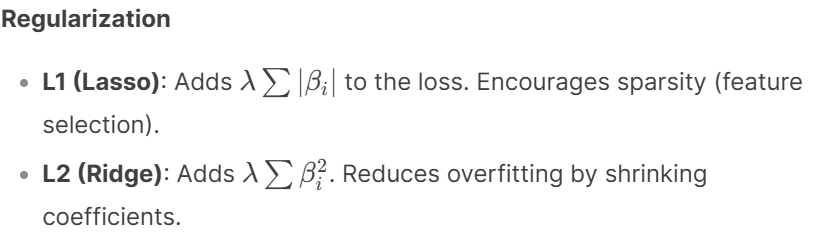

**Assumptions**

* **Binary Outcome:** Dependent variable is categorical (binary or ordinal for extensions).

* **Linearity of Log-Odds:** Log-odds and features have a linear relationship.

* **Independence:** Observations are independent.

* **No Severe Multicollinearity:** Features should not be highly correlated.

**Evaluation Metrics**

* Confusion Matrix: Accuracy, Precision, Recall, F1-Score.

* ROC-AUC: Measures performance across all thresholds.

* Log-Loss: Directly evaluates predicted probabilities.



In [ ]:
model = LogisticRegression(solver="liblinear", random_state=0)
model.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred = model.predict(X_test_sc)

In [ ]:
# Make predictions on the resampled training data
y_train_pred = model.predict(X_train_resampled)

# Calculate accuracy of the model on the resampled training data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

# Optionally, round the accuracy to 2 decimal places
train_accuracy = round(train_accuracy, 2)*100

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy}")


In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)*100
test_accuracy = round(test_accuracy, 2)
test_accuracy

In [ ]:
# Compute confusion matrix
conf_1=confusion_matrix(y_test, y_pred)
conf_1

In [ ]:

# Get the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test_sc)[:, 1]  # Probabilities for class 1 (positive class)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)*100

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc:.4f}")


#### Hyperparameter Tuning 

In [ ]:
# Define the Logistic Regression model
model_1 = LogisticRegression(random_state=0)


# Define the parameter grid for hyperparameter tuning
param_dist = {
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],
    'max_iter': np.arange(100, 1001, 100),  # Values for max_iter (number of iterations)
    'C': np.logspace(-4, 4, 10),  # Regularization strength
    'penalty': ['l2'],  # Only 'l2' penalty for these solvers
    'fit_intercept': [True, False],  # Whether to include an intercept in the model
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_1, 
    param_distributions=param_dist, 
    n_iter=50,  # Number of parameter settings to sample
    cv=5,  # Number of folds in cross-validation
    random_state=0,
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=2
)

# Fit the model to the training data using RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters found during RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions on the test set
y_pred_1 = random_search.predict(X_test_sc)

# Calculate accuracy of the tuned model
accuracy = accuracy_score(y_test, y_pred_1)
print(f"Accuracy of tuned model: {accuracy:.4f}")

In [ ]:
# Initialize the Logistic Regression model with the best parameters
best_model_1 = LogisticRegression(
    solver='liblinear',
    penalty='l2',
    max_iter=100,
    fit_intercept=True,
    C=0.0464,
    random_state=42
)

# Train the model with the training data
best_model_1.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_best = best_model_1.predict(X_test_sc)

# Calculate accuracy of the tuned model
test_accuracy_best = accuracy_score(y_test, y_pred_best) * 100
test_accuracy_best = round(test_accuracy_best, 2)

# Print the test accuracy
print(f"Test Accuracy with Tuned Model: {test_accuracy_best}%")

In [ ]:
# Compute confusion matrix
conf=confusion_matrix(y_test, y_pred_1)
conf

In [ ]:

# Get the predicted probabilities for the positive class
y_pred_proba = best_model_1.predict_proba(X_test_sc)[:, 1]  # Probabilities for class 1 (positive class)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)*100

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc:.4f}")


## 2) Decision Tree

In-Depth Notes on Decision Trees

**1. Overview**

A Decision Tree is a hierarchical model that makes predictions by splitting data into subsets based on feature values. 

It follows a tree structure, where each decision leads to a new branch until a final classification or regression output is reached.

**2. Structure of a Decision Tree**

Root Node: The top-most node representing the entire dataset.

Decision Nodes: Intermediate nodes where the data is split based on a condition.

Leaf Nodes: The terminal nodes that provide the final classification or numerical prediction.

Branches: Connections between nodes representing decision paths

**3. Splitting Criteria**

A Decision Tree determines the best split using impurity measures that assess how mixed the data is. The goal is to create purer subsets.

3.1 For Classification Trees

* Gini Impurity: Measures how often a randomly chosen element would be incorrectly classified.

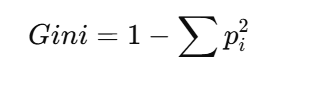
Ranges from 0 (pure split) to 0.5 (even split).

* Entropy (Information Gain): Measures the uncertainty in the dataset.

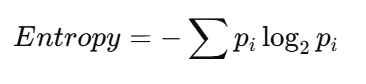

Information Gain = Entropy(parent) - Weighted Entropy(children).

A high Information Gain means a good split

3.2 For Regression Trees

Mean Squared Error (MSE): Measures the variance within subsets.

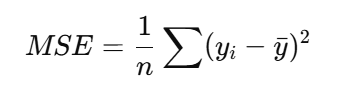

The tree selects splits that minimize MSE.

Mean Absolute Error (MAE): Measures the absolute differences between predicted and actual values.

**4. Stopping Criteria**

A tree can grow until every data point is isolated, leading to overfitting. To prevent this, stopping criteria include:

Maximum depth: Limits the number of splits.

Minimum samples per split: Prevents splits if a node has too few samples.

Minimum impurity decrease: A threshold for stopping based on improvement in purity.

**5. Pruning (Regularization for Decision Trees)**

Pruning reduces model complexity and improves generalization by trimming unnecessary branches.

Pre-Pruning (Early Stopping): Stops tree growth before it overfits (e.g., setting max depth).

Post-Pruning (Prune after Training): Removes branches that don’t improve model performance.

**6. Advantages of Decision Trees**

✅ Interpretability: Easy to understand and visualize.

✅ No Need for Feature Scaling: Works well with raw data.

✅ Handles Categorical & Numerical Data: Supports diverse data types.

✅ Non-Parametric Model: No assumptions about data distribution.

**7. Disadvantages of Decision Trees**

❌ Overfitting: Grows too deep without pruning, leading to poor generalization.

❌ Unstable: Small data changes can result in different structures.

❌ Biased Toward Dominant Classes: In imbalanced datasets, it may favor the majority class.

❌ Greedy Algorithm: Chooses local best splits, which may not be globally optimal.


**8. Improvements & Alternatives**

Random Forest: Uses multiple trees to reduce overfitting.

Gradient Boosting Trees: Builds trees sequentially to correct previous errors.

XGBoost, LightGBM, CatBoost: Optimized tree-based models for large datasets.

In [ ]:
# Training a Basic Decision Tree Model
model_2 = DecisionTreeClassifier()
model_2.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Make predictions on the resampled training data
y_pred_2 = model_2.predict(X_train_resampled)

# Calculate accuracy of the model on the resampled training data
train_accuracy = accuracy_score(y_train_resampled, y_pred_2)

# Optionally, round the accuracy to 2 decimal places
train_accuracy = round(train_accuracy, 2)

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy}")

In [ ]:
#test_accuracy = accuracy_score(y_test, y_pred_2)
#test_accuracy = round(test_accuracy, 2)
#test_accuracy

In [ ]:
print(f"y_test shape: {y_test.shape}")
print(f"y_pred_2 shape: {y_pred_2.shape}")


In [ ]:
# Get the predicted probabilities for the positive class
y_pred_proba = model_2.predict_proba(X_test_sc)[:, 1]  # Probabilities for class 1 (positive class)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)*100

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc:.4f}")

#### Hyperparameter Tuning 

In [ ]:
# Define the Decision Tree model
model_3 = DecisionTreeClassifier(random_state=0)


# Define the parameter grid for hyperparameter tuning
param_dist = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': np.arange(1, 21),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 21),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 21),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Valid options for max_features
    'random_state': [42]
}

# Set up RandomizedSearchCV with Decision Tree Classifier
random_search = RandomizedSearchCV(
    estimator=model_3,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,  # Number of folds in cross-validation
    random_state=42,
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=2
)

# Fit the model to the training data using RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters found during RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions on the test set
y_pred = random_search.predict(X_test_sc)

# Calculate accuracy of the tuned model
test_accuracy = accuracy_score(y_test, y_pred) * 100
test_accuracy = round(test_accuracy, 2)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy}%")

#### Fitting the model based on Best Parameters



In [ ]:
# Initialize the model with the best parameters
best_model_3 = DecisionTreeClassifier(
    random_state=42,
    min_samples_split=7,
    min_samples_leaf=4,
    max_features=None,
    max_depth=13,
    criterion='gini'
)

# Train the model with the training data
best_model_3.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_best = best_model_3.predict(X_test_sc)

# Calculate accuracy of the tuned model
test_accuracy_best = accuracy_score(y_test, y_pred_best) * 100
test_accuracy_best = round(test_accuracy_best, 2)

# Print the test accuracy
print(f"Test Accuracy with Tuned Model: {test_accuracy_best}%")

In [ ]:
from sklearn.metrics import roc_auc_score
# Get the predicted probabilities for the positive class
y_pred_proba = best_model_3.predict_proba(X_test_sc)[:, 1]  # Probabilities for class 1 (positive class)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)*100

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc:.4f}")

### 3) RandomForest

Notes on Random Forest

**1. Overview**

Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. 

It is used for both classification and regression tasks.


**2. How It Works**

Bootstrap Sampling (Bagging):

* Randomly selects subsets of data (with replacement) to train each tree.

Feature Randomness:

* At each split, only a random subset of features is considered to reduce correlation among trees.

Aggregation:

* Classification: Majority vote among trees.
* Regression: Average prediction from all trees.

**3. Key Hyperparameters**

* n_estimators: Number of trees in the forest (higher = better, but computationally expensive).

* max_depth: Limits tree depth to prevent overfitting.

* max_features: Controls the number of features considered at each split (sqrt for classification, log2 for regression).

* min_samples_split: Minimum samples required to split a node.

* min_samples_leaf: Minimum samples required at a leaf node to avoid small splits.

**4. Advantages**

✅ Reduces Overfitting: Multiple trees generalize better.

✅ Handles Missing Data: Works well with missing values.

✅ Works with Large Datasets: Scalable and efficient.

✅ Feature Importance: Identifies important variables.

✅ Resistant to Noise: Less sensitive to small data changes.

**5. Disadvantages**

❌ Computationally Expensive: More trees = slower predictions.

❌ Less Interpretable: Harder to visualize than a single decision tree.

❌ Not Ideal for Sparse Data: Can be inefficient with high-dimensional data.

**6. Random Forest vs Decision Tree**

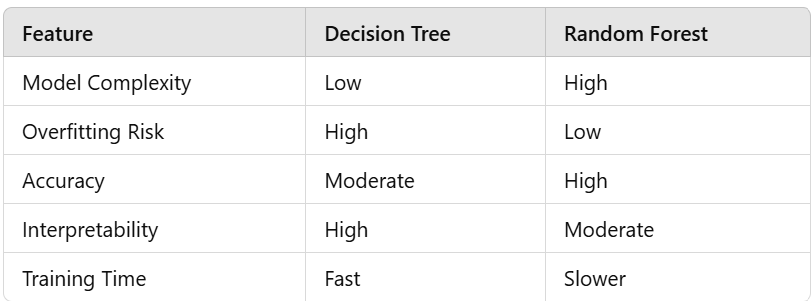


In [ ]:
# Define the base Random Forest model
base_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
base_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_base = base_model.predict(X_test_sc)

# Calculate accuracy of the base model
test_accuracy_base = accuracy_score(y_test, y_pred_base) * 100
test_accuracy_base = round(test_accuracy_base, 2)

# Print the test accuracy
print(f"Test Accuracy of Base Random Forest Model: {test_accuracy_base}%")

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_proba = base_model.predict_proba(X_test_sc)[:, 1]  # Probabilities for class 1 (positive class)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)*100

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc:.4f}")

### Hyperparameter Tuning

In [ ]:

# Define the Random Forest model
model = RandomForestClassifier(random_state=0)

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': np.arange(10, 201, 10),  # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'max_depth': np.arange(1, 21),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 21),  # Minimum number of samples to split a node
    'min_samples_leaf': np.arange(1, 21),  # Minimum number of samples required at leaf nodes
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'random_state': [42]
}

# Set up RandomizedSearchCV with Random Forest Classifier
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,  # Number of folds in cross-validation
    random_state=42,
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=2
)

# Fit the model to the training data using RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters found during RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions on the test set
y_pred = random_search.predict(X_test_sc)

# Calculate accuracy of the tuned model
test_accuracy = accuracy_score(y_test, y_pred) * 100
test_accuracy = round(test_accuracy, 2)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy}%")

### Fitting Best Parameters to Random Forest Model

In [ ]:
# Initialize the Random Forest model with the best parameters
best_model_rf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    min_samples_split=15,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=15,
    bootstrap=True
)

# Train the model with the training data
best_model_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = best_model_rf.predict(X_test_sc)

# Calculate accuracy of the tuned model
test_accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
test_accuracy_rf = round(test_accuracy_rf, 2)

# Print the test accuracy
print(f"Test Accuracy of Tuned Random Forest Model: {test_accuracy_rf}%")

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_proba = best_model_rf.predict_proba(X_test_sc)[:, 1]  # Probabilities for class 1 (positive class)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)*100

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc:.4f}")

## 4) XGBoost

**1. Overview**

XGBoost (eXtreme Gradient Boosting) is a powerful, optimized gradient boosting algorithm used for classification and regression. 

It is known for its speed, accuracy, and handling of large datasets.

**2. Key Features**

✅ Boosting Method: Improves predictions by sequentially correcting errors of previous trees.

✅ Regularization (L1 & L2): Reduces overfitting, making it better than standard boosting.

✅ Parallelization: Uses multiple CPU cores, making it faster than traditional gradient boosting.

✅ Handles Missing Data: Automatically learns best splits for missing values.

✅ Tree Pruning: Uses a "max depth" parameter instead of pre-pruning.

✅ Built-in Cross-Validation: Improves model tuning efficiency.

**3. How It Works**

Boosting Process:

* Trees are built sequentially, correcting errors from previous trees.

* Uses gradient descent to minimize the loss function.

Weighted Trees:

* New trees focus more on misclassified samples from prior trees.

Final Prediction:

* Classification: Weighted majority vote.

* Regression: Weighted average of tree predictions.

4. Key Hyperparameters

* n_estimators: Number of trees (higher can improve performance but increases training time).

* learning_rate (eta): Shrinks each tree’s contribution (small values improve generalization).

* max_depth: Limits tree depth to control complexity.

* subsample: Percentage of training data used per tree (prevents overfitting).

* colsample_bytree: Number of features randomly selected per tree.

* lambda (L2 regularization) & alpha (L1 regularization): Prevents overfitting.

5. Advantages

✅ Fast & Scalable: Optimized for speed and large datasets.

✅ Handles Missing Values: No need for imputation.

✅ Prevents Overfitting: Regularization and early stopping help generalization.

✅ Works with Imbalanced Data: Supports weighted classes.

6. Disadvantages

❌ Computationally Expensive: Requires more memory and tuning than simpler models.

❌ Hyperparameter Tuning Needed: Performance depends on careful tuning.

❌ Less Interpretable: Harder to explain compared to decision trees.


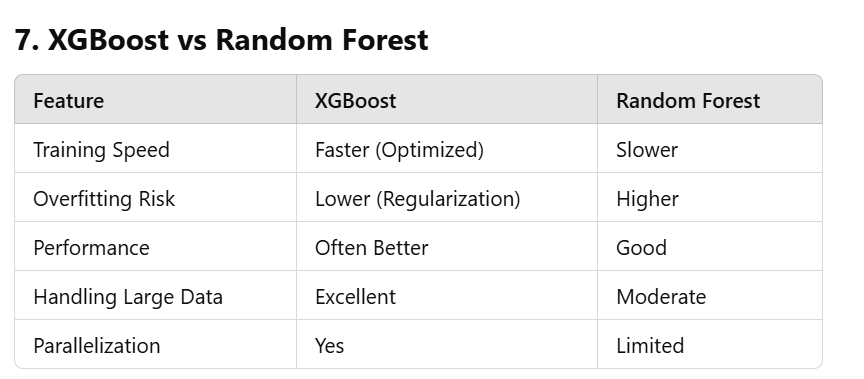

In [ ]:
import xgboost as xgb
# Initialize the XGBoost classifier
xgboost_model = xgb.XGBClassifier(random_state=0)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 301, 50),
    'max_depth': np.arange(3, 15, 2),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 5, 10]
}

# Set up RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgboost_model, param_distributions=param_dist, 
                                   n_iter=10, cv=3, verbose=2, random_state=0, n_jobs=-1)

# Fit the RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_model_4 = random_search.best_estimator_

# Make predictions
y_pred_4 = best_model_4.predict(X_test_sc)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_4)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_4))


### Best Parameter From XGBoost

In [ ]:
# Initialize the XGBoost model with the best parameters
xgboost_model = xgb.XGBClassifier(**best_params, random_state=0)

# Train the model with the training data
xgboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgboost_model.predict(X_test_sc)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Feature Importance visualization
#xgb.plot_importance(xgboost_model, importance_type="weight", max_num_features=10)
#plt.title("Top 10 Feature Importance (XGBoost)")
#plt.show()

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_proba = xgboost_model.predict_proba(X_test_sc)[:, 1]  # Probabilities for class 1 (positive class)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)*100

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc:.4f}")

### Hyperparameter Tuning in XGBoost

Proper tuning of XGBoost parameters is crucial for achieving the best model performance.

Below are the most important hyperparameters and how to optimize them.

**1. Core Hyperparameters**

1.1. Number of Trees (n_estimators)

* Controls the number of boosting rounds (trees).
* More trees improve performance but increase computation time and risk overfitting.

Tuning Strategy:

* Start with 100-500 trees and use early stopping to find the optimal number.

1.2. Learning Rate (learning_rate or eta)

Shrinks the contribution of each new tree to avoid overfitting.

Lower values (e.g., 0.01 - 0.1) require more trees but improve generalization.

Tuning Strategy:
Start with 0.1, then adjust based on validation performance.

1.3. Maximum Tree Depth (max_depth)

* Controls the complexity of trees.

* Deeper trees (e.g., >10) increase the risk of overfitting.

* Shallow trees (e.g., <3) may underfit.

Tuning Strategy:

* Try values from 3 to 10.

* Use cross-validation to balance depth and performance.

**2. Regularization Parameters**

2.1. L1 Regularization (alpha)

* Reduces the number of features by shrinking less important ones to zero.

* Useful for high-dimensional, sparse data.

Tuning Strategy:

* Test values: 0, 0.1, 1, 10.

* Higher values lead to more feature selection.

2.2. L2 Regularization (lambda)

* Reduces overfitting by penalizing large weights.

* Helps with collinear features.

Tuning Strategy:

* Start with 1.

* Increase to 5-10 if overfitting is detected.

2.3. Minimum Child Weight (min_child_weight)

* Controls the minimum sum of weights needed to create a new node.

* Higher values prevent small, noisy splits.

Tuning Strategy:

* Test values: 1, 5, 10.

* Higher values prevent overfitting.

**3. Subsampling Parameters (To Reduce Overfitting)**

3.1. Subsample (subsample)

* Fraction of training samples used in each tree.

* Lower values (e.g., 0.6 - 0.9) prevent overfitting.

Tuning Strategy:

* Try 0.6 to 1.0.

* 0.8 is a good starting point.

3.2. Feature Sampling (colsample_bytree)

* Fraction of features randomly selected per tree.

* Lower values (e.g., 0.5 - 0.8) prevent overfitting.

Tuning Strategy:

* Start with 0.8.

* Reduce if overfitting occurs.

**4. Optimization Strategy**

(a) Start with Default Values

n_estimators=100, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8.

(b) Use Grid Search or Random Search

* Grid Search: Exhaustively tries all parameter combinations (slow but precise).

* Random Search: Tests random combinations, finding good values faster.

(c) Use Bayesian Optimization (Advanced)

More efficient than grid/random search for large datasets.

(d) Apply Early Stopping

Set early_stopping_rounds=10-50 using a validation set to stop training when performance stops improving.


**5. Practical Tuning Example**

Step 1: Tune Tree-Based Parameters

* max_depth: Try 3, 5, 7, 9.

* min_child_weight: Try 1, 3, 5.

Step 2: Tune Regularization

* alpha: Try 0, 0.1, 1.

* lambda: Try 1, 5, 10.

Step 3: Tune Learning Rate & n_estimators

* Lower learning_rate and increase n_estimators.

Step 4: Tune Subsampling

* subsample: Try 0.6, 0.8, 1.0.

* colsample_bytree: Try 0.6, 0.8, 1.0.

### Hyperparameter Tuning XGBoost

In [241]:
# Initialize the XGBoost classifier
xgboost_model_1 = xgb.XGBClassifier(random_state=0)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 301, 50),  # Number of trees in the model
    'max_depth': np.arange(3, 15, 2),         # Depth of the trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Step size at each iteration
    'subsample': [0.6, 0.8, 1.0],            # Proportion of samples to use per tree
    'colsample_bytree': [0.6, 0.8, 1.0],     # Proportion of features to use per tree
    'gamma': [0, 0.1, 0.2, 0.3],             # Minimum loss reduction required to split a node
    'min_child_weight': [1, 5, 10]            # Minimum sum of instance weight in a child node
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgboost_model, 
    param_distributions=param_dist, 
    n_iter=50,   # Number of parameter settings to sample
    cv=3,        # Number of folds in cross-validation
    verbose=2,   # Print progress
    random_state=42,  # Random state for reproducibility
    n_jobs=-1,   # Use all available cores for parallel processing
    scoring='accuracy'  # Optimize for accuracy
)

# Fit the model to the training data using RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters found during RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_model_XGBoost = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model_XGBoost.predict(X_test_sc)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': np.int64(200), 'min_child_weight': 5, 'max_depth': np.int64(9), 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
Accuracy: 0.8336
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4152
           1       0.65      0.48      0.55      1120

    accuracy                           0.83      5272
   macro avg       0.76      0.71      0.72      5272
weighted avg       0.82      0.83      0.82      5272



In [242]:
# Get the predicted probabilities for the positive class
y_pred_proba = best_model_XGBoost.predict_proba(X_test_sc)[:, 1]  # Probabilities for class 1 (positive class)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)*100

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 82.8718



## Feature Importance

This section will answer this question

What were the most important features (demographic, behavioral, and attitudinal) for predicting H1N1 vaccine uptake using machine learning models? (Feature Importance)

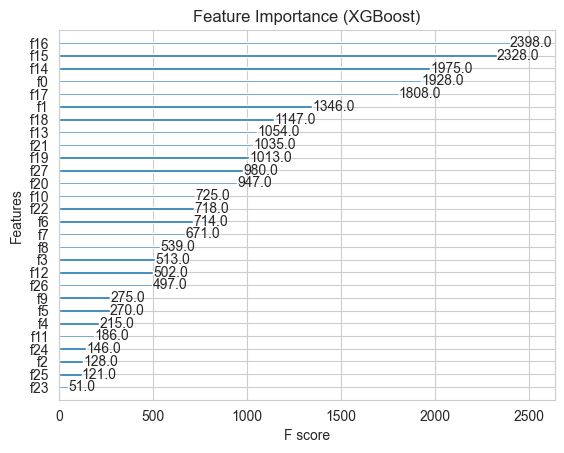

In [245]:
# Feature Importance visualization

feature_names = [
    "h1n1_concern", "h1n1_knowledge", "behavioral_antiviral_meds", 
    "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands", 
    "behavioral_large_gatherings", "behavioral_outside_home", "behavioral_touch_face", 
    "doctor_recc_h1n1", "chronic_med_condition", "child_under_6_months", "health_worker", 
    "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", 
    "age_group", "education", "race", "sex", "income_poverty", "marital_status", 
    "employment_status", "household_adults", "household_children"
]
xgb.plot_importance(best_model_XGBoost)
plt.title("Feature Importance (XGBoost)")
plt.show()

In [246]:
# Create a mapping from f0, f1, ... to actual feature names
feature_mapping = {f"f{i}": feature_names[i] for i in range(len(feature_names))}

# Example: Print out mapped feature names
for feature, name in feature_mapping.items():
    print(f"{feature} -> {name}")

f0 -> h1n1_concern
f1 -> h1n1_knowledge
f2 -> behavioral_antiviral_meds
f3 -> behavioral_avoidance
f4 -> behavioral_face_mask
f5 -> behavioral_wash_hands
f6 -> behavioral_large_gatherings
f7 -> behavioral_outside_home
f8 -> behavioral_touch_face
f9 -> doctor_recc_h1n1
f10 -> chronic_med_condition
f11 -> child_under_6_months
f12 -> health_worker
f13 -> opinion_h1n1_vacc_effective
f14 -> opinion_h1n1_risk
f15 -> opinion_h1n1_sick_from_vacc
f16 -> age_group
f17 -> education
f18 -> race
f19 -> sex
f20 -> income_poverty
f21 -> marital_status
f22 -> employment_status
f23 -> household_adults
f24 -> household_children


The feature importance analysis from the XGBoost model highlights that age group (f16), opinion on getting sick from the vaccine, opinion on H1N1 vaccine risk (f14), and H1N1 concern (f0) are the most critical factors. This suggests that age demographics and risk perception play a significant role in predicting vaccination decisions. Education (f17), race (f18), and sex (f19) also have substantial importance, indicating that demographic and societal factors strongly influence vaccination behavior.

In contrast, features such as household adults (f23), household children (f24), and behavioral antiviral medication use (f2) have minimal impact. This suggests that household composition and certain preventive behaviors are not strong predictors in this model.



## Recommendations and Concusion 

Age-Specific Outreach: Since age is the most significant predictor, vaccination campaigns should tailor messaging based on age group concerns and preferences.

Risk Perception Awareness: Misconceptions about the vaccine’s risk are highly influential. Public health campaigns should focus on correcting misinformation.

Targeted Education Programs: Given the importance of education and race, community engagement efforts should be adjusted for different educational backgrounds and cultural perspectives.

Doctor Involvement: Medical professionals should be leveraged to improve vaccine acceptance, as doctor recommendations (f9) and chronic medical conditions (f10) are among the influential factors.

Refinement of Public Health Strategies: More emphasis should be placed on factors with higher predictive power while deprioritizing less relevant features like household structure and certain behavioral aspects.

These insights can help improve vaccine uptake by focusing resources on the most impactful factors influencing decision-making.